<a href="https://colab.research.google.com/github/gasyakoc/DSA210/blob/main/dsa210.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np

# Excel dosyasını yüklemek
data = pd.read_excel("dsa210_rawdata.xlsx")  # Burada doğru dosya yolunu belirtin

# Eksik verileri yalnızca sayısal sütunlarda doldurma
numeric_columns = data.select_dtypes(include=[np.number]).columns
data[numeric_columns] = data[numeric_columns].fillna(data[numeric_columns].mean())

# Kategorik değişkenlerin tiplerini dönüştürme
categorical_columns = data.select_dtypes(include=['object']).columns
for column in categorical_columns:
    data[column] = data[column].astype('category')

print("Eksik veriler dolduruldu ve kategorik değişkenler dönüştürüldü.")

import matplotlib.pyplot as plt
import seaborn as sns


Eksik veriler dolduruldu ve kategorik değişkenler dönüştürüldü.


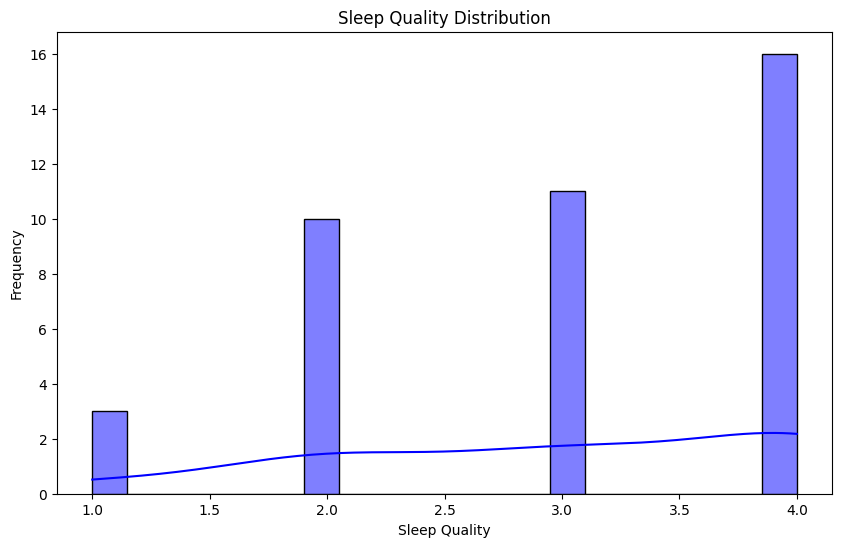

In [15]:
# Sleep Quality Distribution
plt.figure(figsize=(10, 6))
sns.histplot(data['Sleep Quality Rating (1-4)'], bins=20, kde=True, color='blue')
plt.title('Sleep Quality Distribution')
plt.xlabel('Sleep Quality')
plt.ylabel('Frequency')
plt.show()


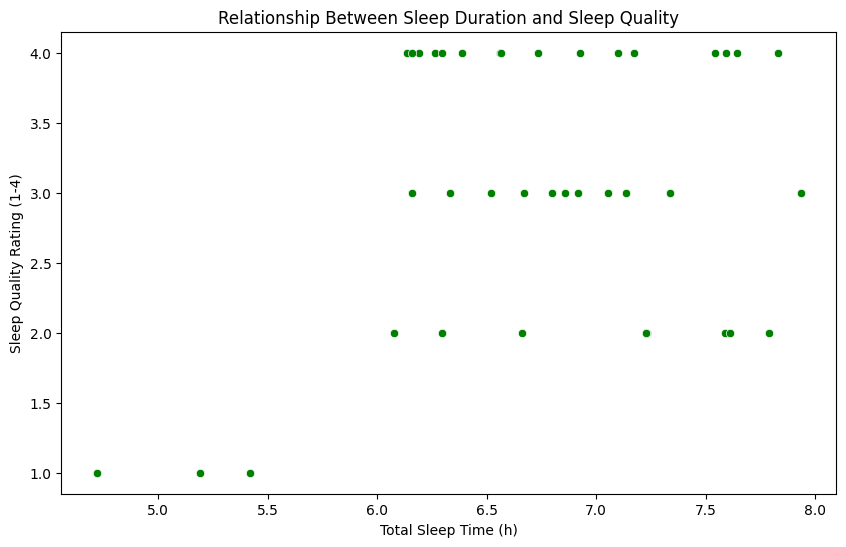

In [16]:
# Relationship Between Sleep Duration and Sleep Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Total Sleep Time (h)', y='Sleep Quality Rating (1-4)', data=data, color='green')
plt.title('Relationship Between Sleep Duration and Sleep Quality')
plt.xlabel('Total Sleep Time (h)')
plt.ylabel('Sleep Quality Rating (1-4)')
plt.show()


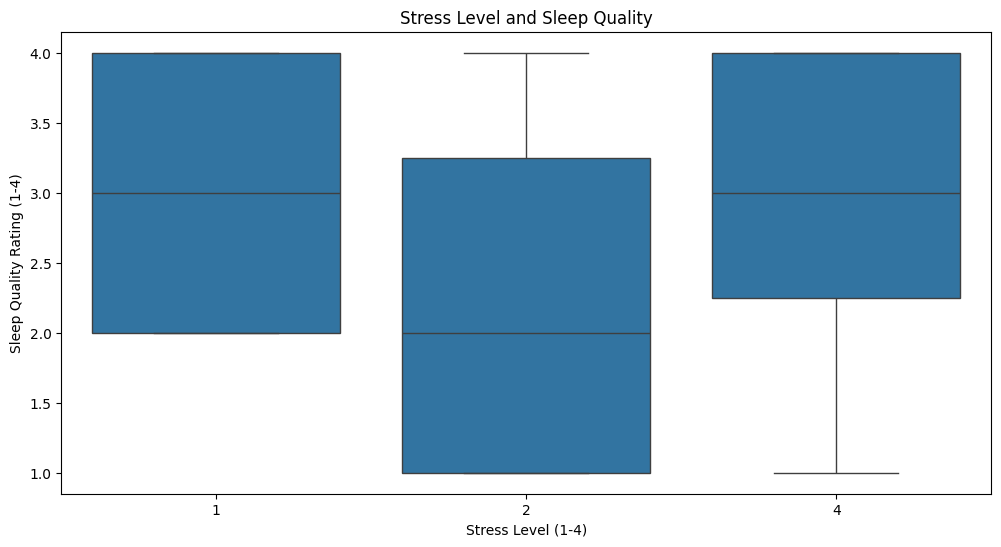

In [17]:
# Stress Level vs Sleep Quality
plt.figure(figsize=(12, 6))
sns.boxplot(x='Stress Level (1-4)', y='Sleep Quality Rating (1-4)', data=data)
plt.title('Stress Level and Sleep Quality')
plt.xlabel('Stress Level (1-4)')
plt.ylabel('Sleep Quality Rating (1-4)')
plt.show()


<ipython-input-19-bf19ed543ffa>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='Environment During Sleep', y='Sleep Quality Rating (1-4)', data=data, palette='muted')


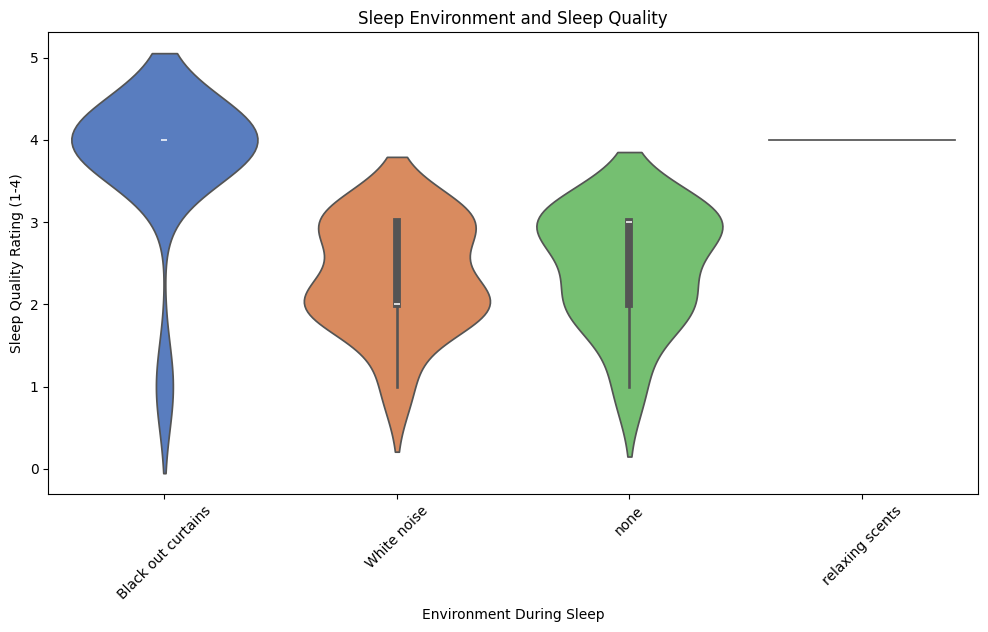

In [19]:
# Sleep Environment and Sleep Quality
plt.figure(figsize=(12, 6))
sns.violinplot(x='Environment During Sleep', y='Sleep Quality Rating (1-4)', data=data, palette='muted')
plt.title('Sleep Environment and Sleep Quality')
plt.xlabel('Environment During Sleep')
plt.ylabel('Sleep Quality Rating (1-4)')
plt.xticks(rotation=45)
plt.show()


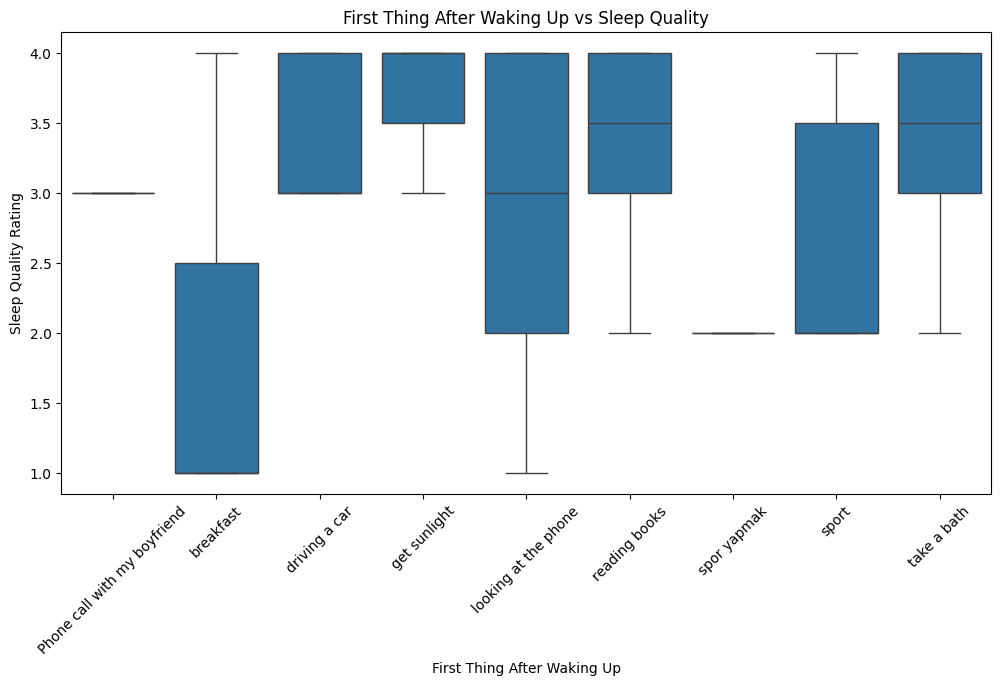

In [20]:
# Morning Routine and Sleep Quality
plt.figure(figsize=(12, 6))
sns.boxplot(x='First Thing After Waking Up', y='Sleep Quality Rating (1-4)', data=data)
plt.title('First Thing After Waking Up vs Sleep Quality')
plt.xlabel('First Thing After Waking Up')
plt.ylabel('Sleep Quality Rating')
plt.xticks(rotation=45)
plt.show()


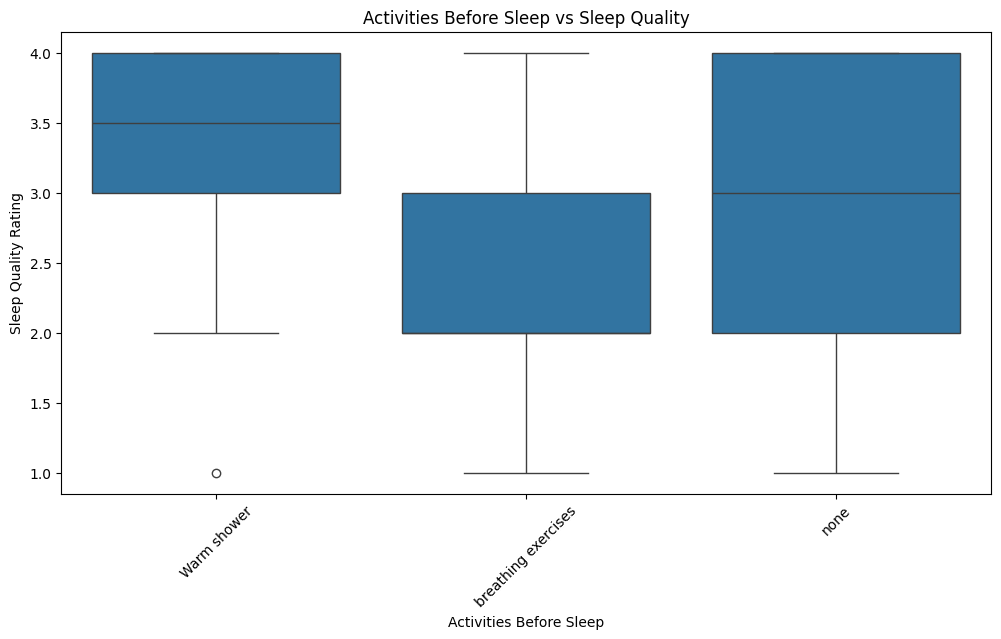

In [21]:
# Activities Done Just Before Sleep
plt.figure(figsize=(12, 6))
sns.boxplot(x='Activities Done Just Before Sleep', y='Sleep Quality Rating (1-4)', data=data)
plt.title('Activities Before Sleep vs Sleep Quality')
plt.xlabel('Activities Before Sleep')
plt.ylabel('Sleep Quality Rating')
plt.xticks(rotation=45)
plt.show()


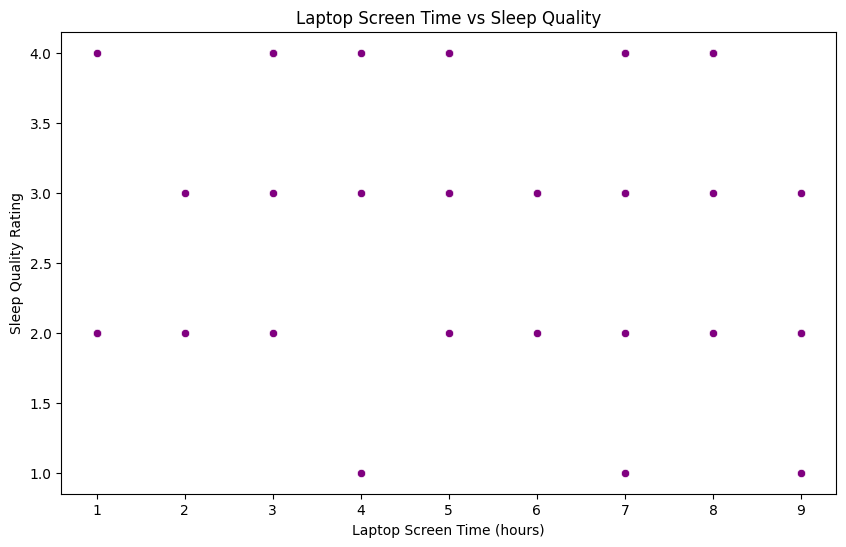

In [ ]:
# Laptop Screen Time vs Sleep Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen Time Laptop (h)', y='Sleep Quality Rating (1-4)', data=data, color='purple')
plt.title('Laptop Screen Time vs Sleep Quality')
plt.xlabel('Laptop Screen Time (hours)')
plt.ylabel('Sleep Quality Rating')
plt.show()


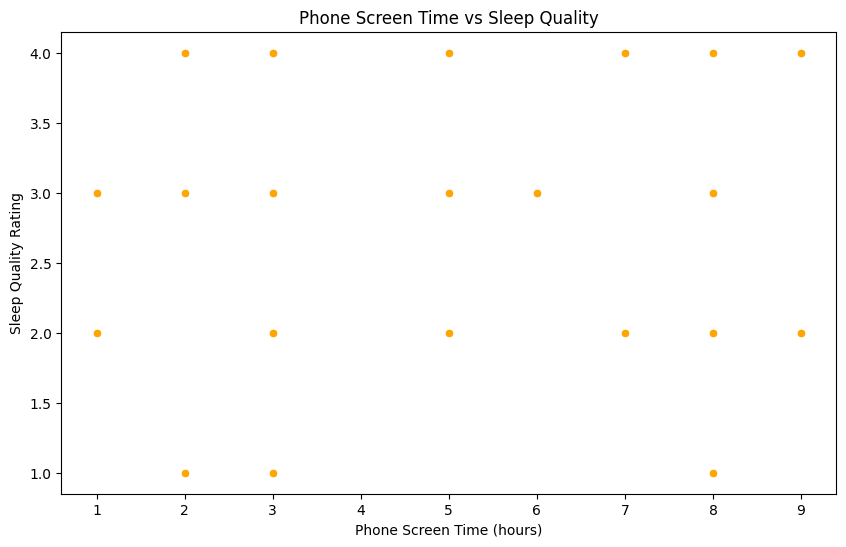

In [ ]:
# Phone Screen Time vs Sleep Quality
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Screen Time Phone (h)', y='Sleep Quality Rating (1-4)', data=data, color='orange')
plt.title('Phone Screen Time vs Sleep Quality')
plt.xlabel('Phone Screen Time (hours)')
plt.ylabel('Sleep Quality Rating')
plt.show()


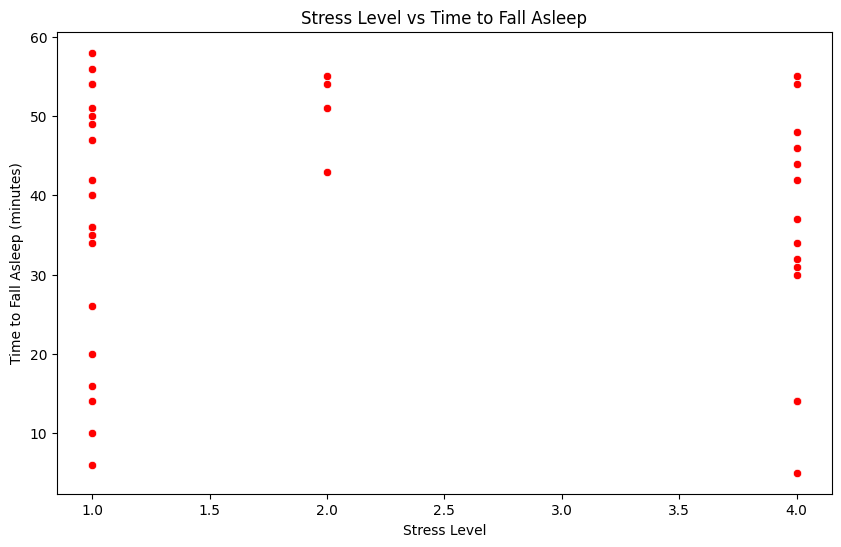

In [ ]:
# Stress Level vs Time to Fall Asleep
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Stress Level (1-4)', y='Time to Fall Asleep (min)', data=data, color='red')
plt.title('Stress Level vs Time to Fall Asleep')
plt.xlabel('Stress Level')
plt.ylabel('Time to Fall Asleep (minutes)')
plt.show()


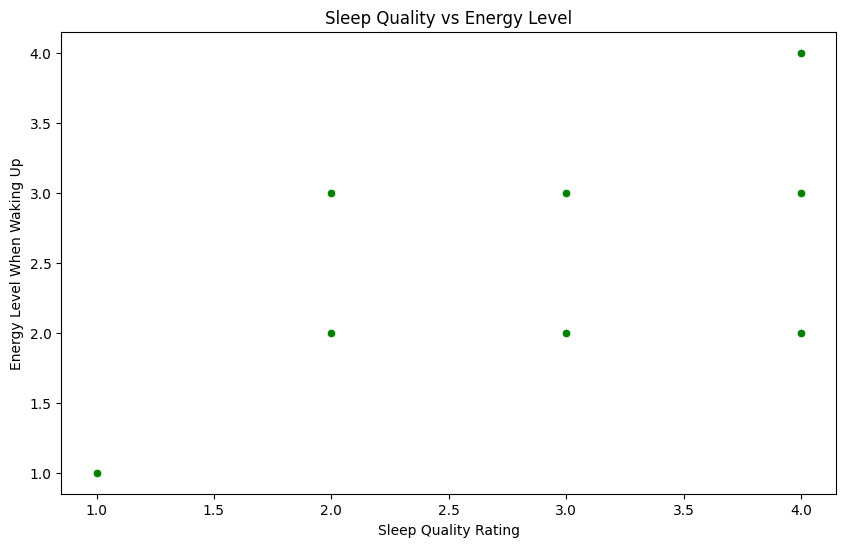

In [ ]:
# Sleep Quality vs Energy Level
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Sleep Quality Rating (1-4)', y='The Energy Level You Feel When You Wake Up (1-4)', data=data, color='green')
plt.title('Sleep Quality vs Energy Level')
plt.xlabel('Sleep Quality Rating')
plt.ylabel('Energy Level When Waking Up')
plt.show()


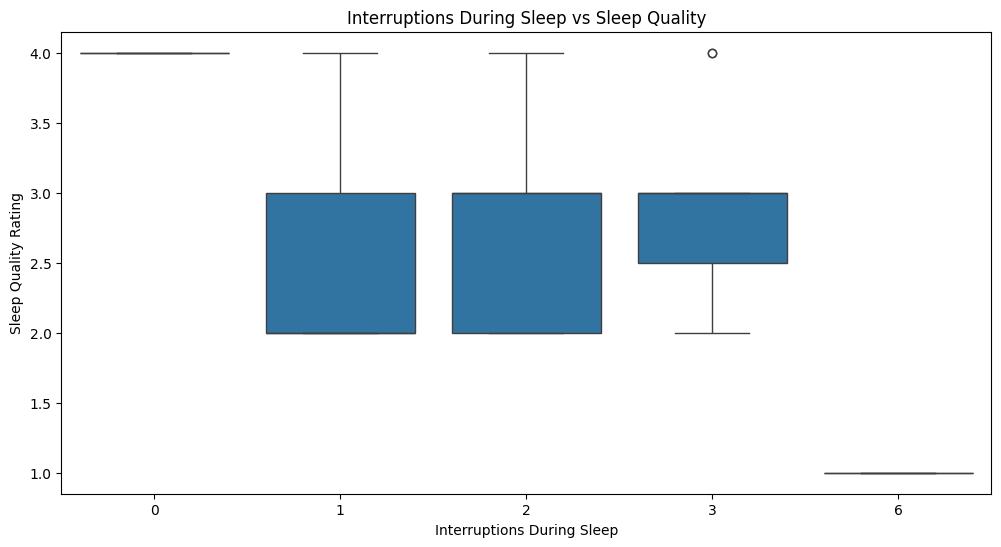

In [ ]:
# Interruptions During Sleep vs Sleep Quality
plt.figure(figsize=(12, 6))
sns.boxplot(x='Interruptions During Sleep', y='Sleep Quality Rating (1-4)', data=data)
plt.title('Interruptions During Sleep vs Sleep Quality')
plt.xlabel('Interruptions During Sleep')
plt.ylabel('Sleep Quality Rating')
plt.show()


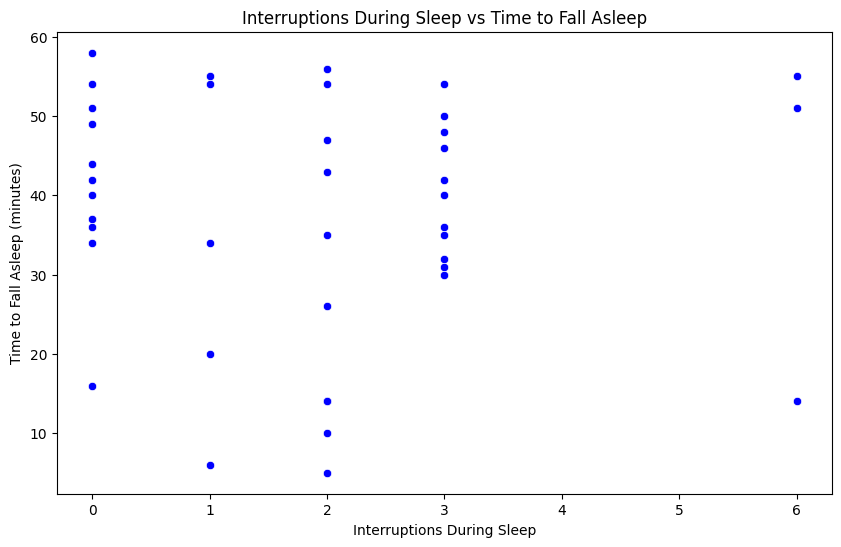

In [ ]:
# Interruptions During Sleep vs Time to Fall Asleep
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Interruptions During Sleep', y='Time to Fall Asleep (min)', data=data, color='blue')
plt.title('Interruptions During Sleep vs Time to Fall Asleep')
plt.xlabel('Interruptions During Sleep')
plt.ylabel('Time to Fall Asleep (minutes)')
plt.show()


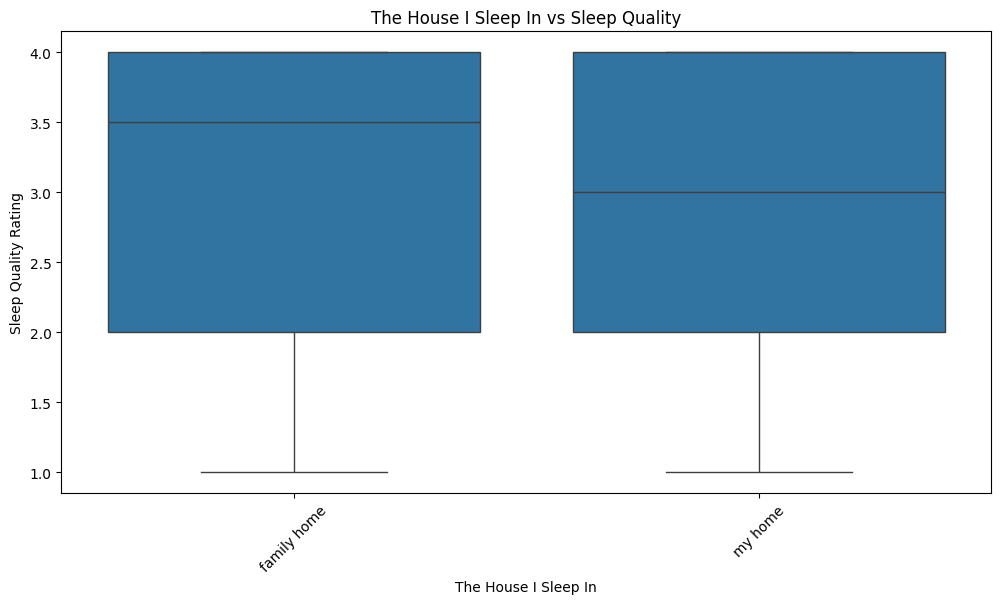

In [22]:
# The House I Sleep In vs Sleep Quality
plt.figure(figsize=(12, 6))
sns.boxplot(x='the house i sleep in', y='Sleep Quality Rating (1-4)', data=data)
plt.title('The House I Sleep In vs Sleep Quality')
plt.xlabel('The House I Sleep In')
plt.ylabel('Sleep Quality Rating')
plt.xticks(rotation=45)
plt.show()


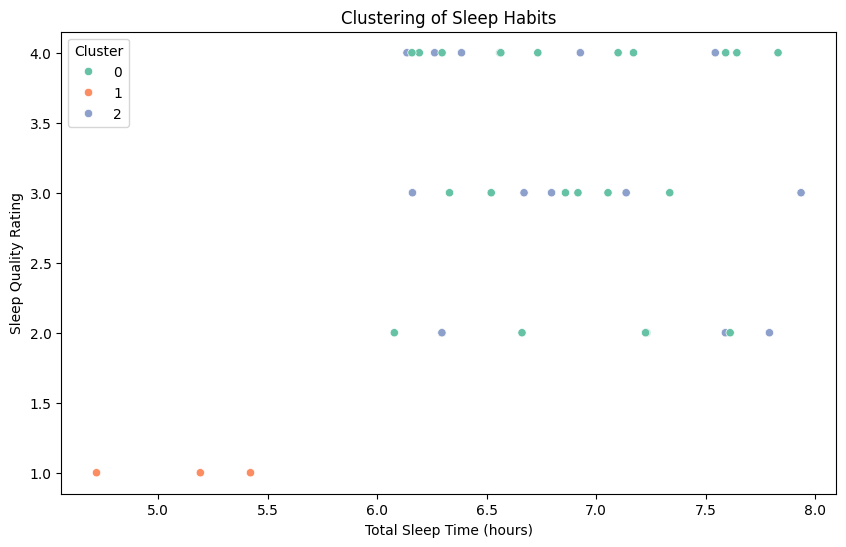

In [ ]:
# Clustering of Sleep Habits
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Sleep Quality Rating (1-4)', 'Time to Fall Asleep (min)', 'Total Sleep Time (h)', 'Stress Level (1-4)', 'Interruptions During Sleep']
data_scaled = StandardScaler().fit_transform(data[features].dropna())

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(data_scaled)

plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['Total Sleep Time (h)'], y=data['Sleep Quality Rating (1-4)'], hue=data['Cluster'], palette='Set2')
plt.title('Clustering of Sleep Habits')
plt.xlabel('Total Sleep Time (hours)')
plt.ylabel('Sleep Quality Rating')
plt.legend(title='Cluster')
plt.show()


In [23]:
# Gerekli kütüphaneler
import statsmodels.api as sm

# Bağımsız ve bağımlı değişkenlerin seçimi
X = data[['Total Sleep Time (h)', 'Time to Fall Asleep (min)', 'Stress Level (1-4)', 'Interruptions During Sleep']]
y = data['Sleep Quality Rating (1-4)']

# Eksik değerleri temizleme
X = X.dropna()
y = y.loc[X.index]

# Sabit ekleme (constant) - regresyon için gerekli
X = sm.add_constant(X)

# Regresyon modeli oluşturma ve fit etme
model = sm.OLS(y, X).fit()

# Model özetini yazdırma
print(model.summary())


                                OLS Regression Results                                
Dep. Variable:     Sleep Quality Rating (1-4)   R-squared:                       0.558
Model:                                    OLS   Adj. R-squared:                  0.507
Method:                         Least Squares   F-statistic:                     11.03
Date:                        Sat, 28 Dec 2024   Prob (F-statistic):           6.80e-06
Time:                                14:56:12   Log-Likelihood:                -39.418
No. Observations:                          40   AIC:                             88.84
Df Residuals:                              35   BIC:                             97.28
Df Model:                                   4                                         
Covariance Type:                    nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------

In [24]:
# Gerekli kütüphaneleri içe aktar
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.optimize import linprog
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
import shap
import random

# 2. Optimizasyon Analizi
# Maksimum uyku kalitesini sağlayan stres seviyesi, uyku kesintisi ve uyku süresi kombinasyonunu bulma
c = [-1]  # Uyku kalitesini maksimize etmek için negatif işaret
A = [[1], [1]]  # Stres seviyesi ve uyku kesintilerinin sınırlamaları
daily_limits = [4, 3]  # Günlük limitler
b = daily_limits
res = linprog(c, A_ub=A, b_ub=b, bounds=(0, None))
print("Optimal Uyku Kalitesi Kombinasyonu:", res.x)




Optimal Uyku Kalitesi Kombinasyonu: [3.]


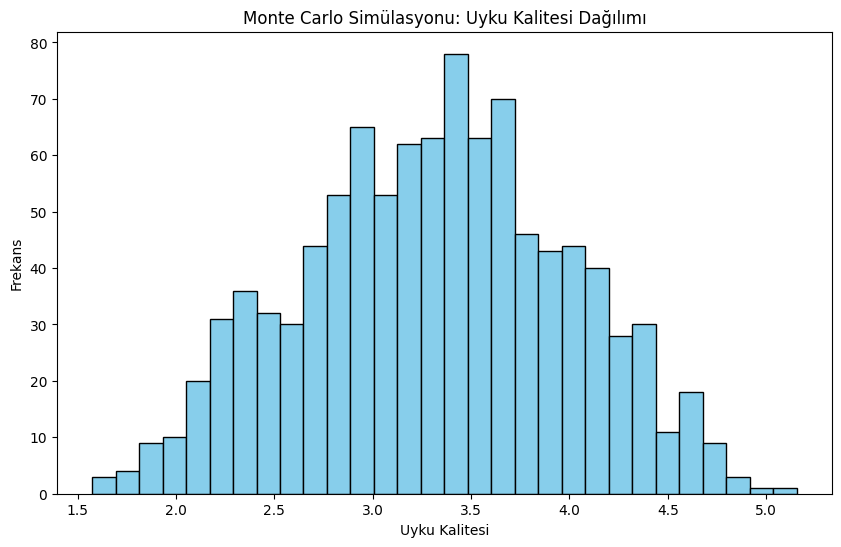

In [ ]:
# 7. Monte Carlo Simülasyonu
simulation_results = []
for _ in range(1000):
    stress = random.uniform(1, 4)  # Stres seviyesi
    interruptions = random.uniform(0, 5)  # Uyku kesintileri
    sleep_duration = random.uniform(4, 9)  # Uyku süresi
    sleep_quality = max(0, 4 - 0.5 * stress - 0.3 * interruptions + 0.2 * sleep_duration)
    simulation_results.append(sleep_quality)

plt.figure(figsize=(10, 6))
plt.hist(simulation_results, bins=30, color='skyblue', edgecolor='black')
plt.title('Monte Carlo Simülasyonu: Uyku Kalitesi Dağılımı')
plt.xlabel('Uyku Kalitesi')
plt.ylabel('Frekans')
plt.show()

In [25]:
# 8. Öneri Motoru
best_routine = {
    "Stress Level (1-4)": 1,
    "Interruptions During Sleep": 0,
    "Total Sleep Time (h)": 8,
    "Away From Blue Light (30 min)": "Yes",
    "Pre-Sleep Nutrition": "Light Meal",
    "Environment During Sleep": "Quiet and Dark",
    "Activities Done Just Before Sleep": "Relaxing Activities",
    "First Thing After Waking Up": "Light Stretching",
    "Screen Time Laptop (h)": 0,
    "Screen Time Phone (h)": 0,
}
print("En İyi Uyku Rutin Önerisi:", best_routine)

En İyi Uyku Rutin Önerisi: {'Stress Level (1-4)': 1, 'Interruptions During Sleep': 0, 'Total Sleep Time (h)': 8, 'Away From Blue Light (30 min)': 'Yes', 'Pre-Sleep Nutrition': 'Light Meal', 'Environment During Sleep': 'Quiet and Dark', 'Activities Done Just Before Sleep': 'Relaxing Activities', 'First Thing After Waking Up': 'Light Stretching', 'Screen Time Laptop (h)': 0, 'Screen Time Phone (h)': 0}


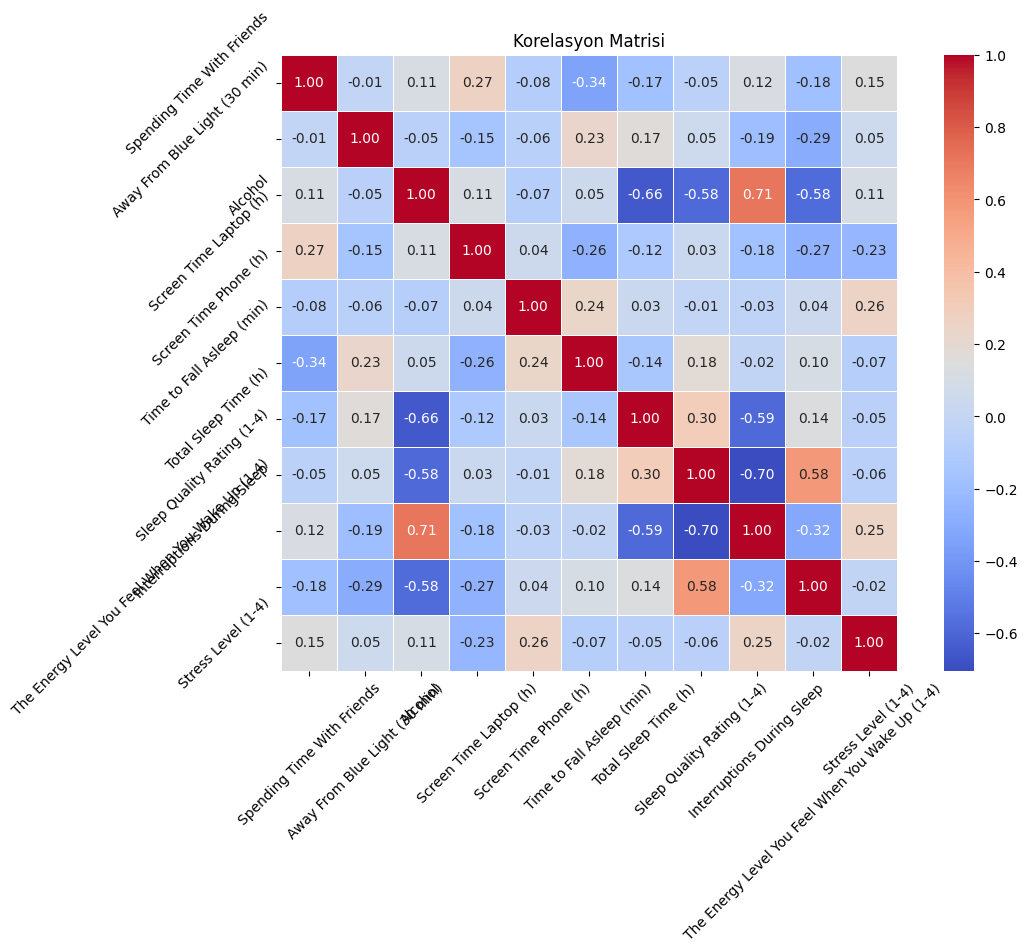

In [26]:
# 3. Korelasyon Analizi
plt.figure(figsize=(12, 8))
# Sadece sayısal sütunları seçmek için data.corr() öncesinde sayısal tipleri filtreliyoruz
numeric_columns = data.select_dtypes(include=[np.number])
corr_matrix = numeric_columns.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', square=True, linewidths=0.5)
plt.title('Korelasyon Matrisi')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.show()

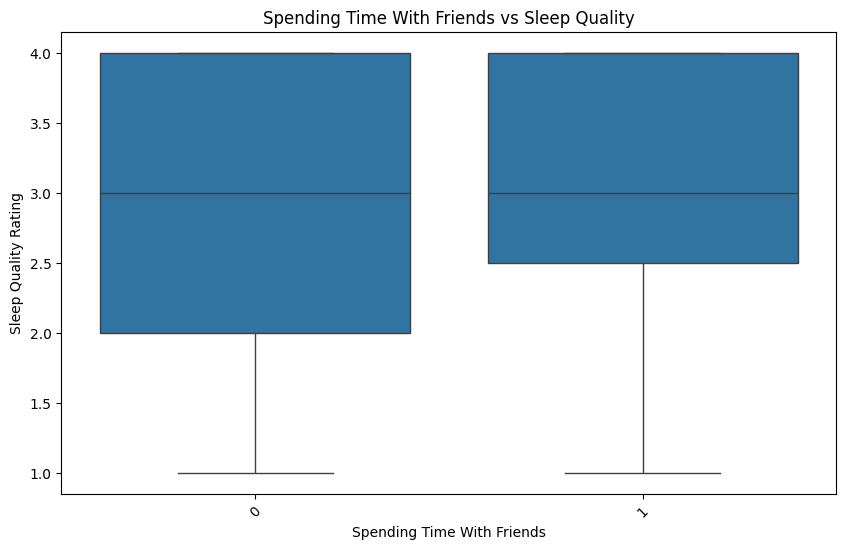

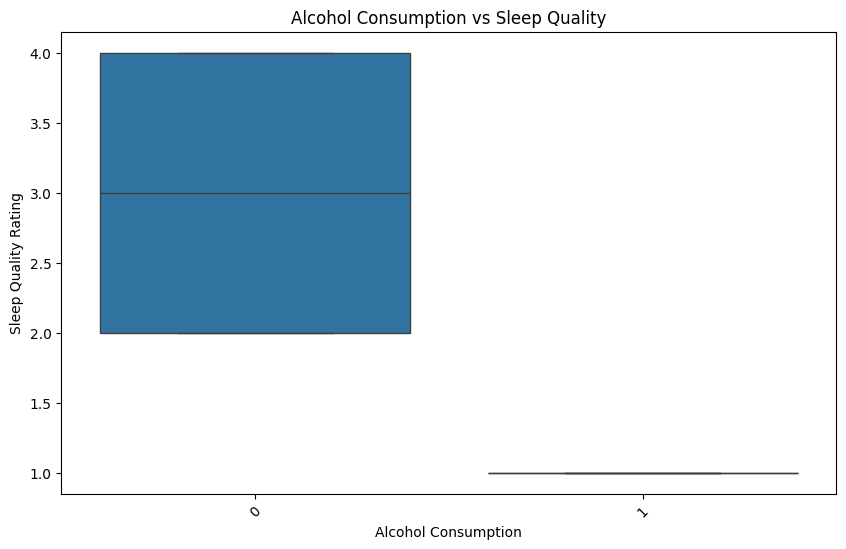

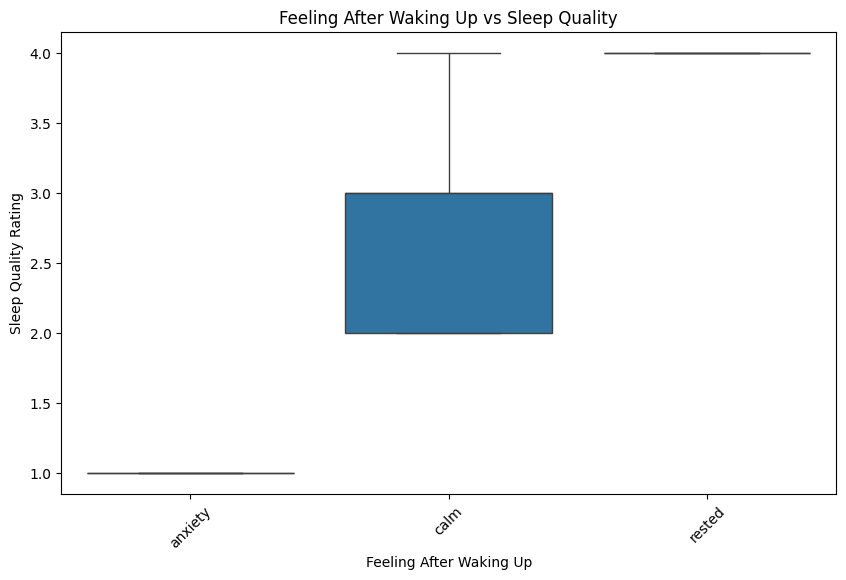

In [28]:
# Spending Time With Friends ve Uyku Kalitesi Analizi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Spending Time With Friends', y='Sleep Quality Rating (1-4)', data=data)
plt.title('Spending Time With Friends vs Sleep Quality')
plt.xlabel('Spending Time With Friends')
plt.ylabel('Sleep Quality Rating')
plt.xticks(rotation=45)
plt.show()

# Alcohol ve Uyku Kalitesi Analizi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alcohol', y='Sleep Quality Rating (1-4)', data=data)
plt.title('Alcohol Consumption vs Sleep Quality')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Sleep Quality Rating')
plt.xticks(rotation=45)
plt.show()

# The Feeling You Feel After Waking Up ve Uyku Kalitesi Analizi
plt.figure(figsize=(10, 6))
sns.boxplot(x='The Feeling You Feel After Waking Up', y='Sleep Quality Rating (1-4)', data=data)
plt.title('Feeling After Waking Up vs Sleep Quality')
plt.xlabel('Feeling After Waking Up')
plt.ylabel('Sleep Quality Rating')
plt.xticks(rotation=45)
plt.show()

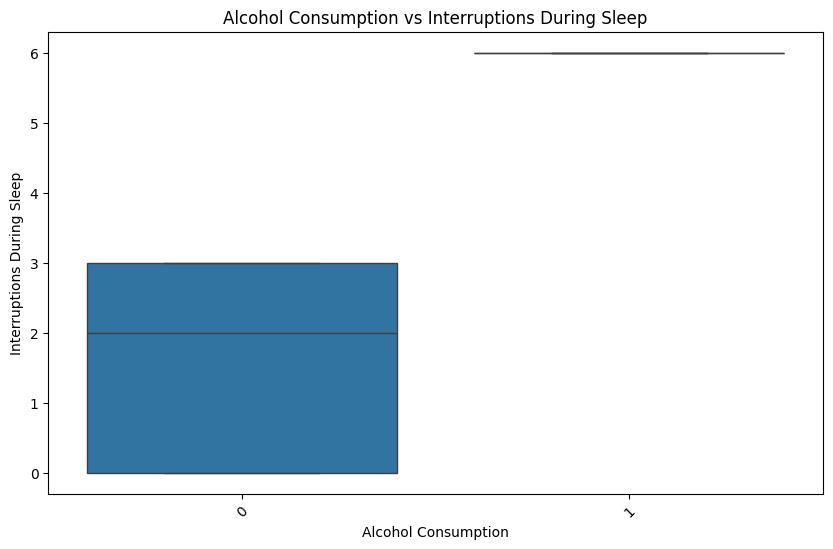

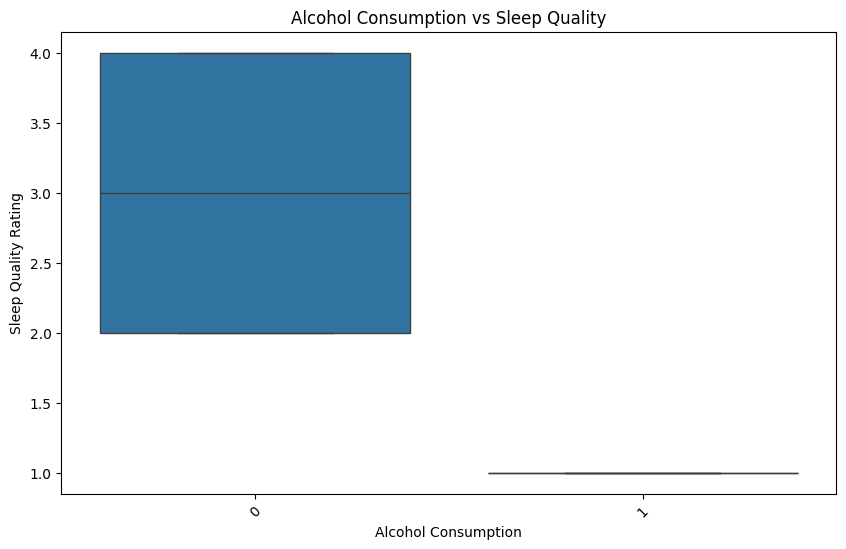

In [29]:
# Alcohol ve Uyku Kesintileri Analizi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alcohol', y='Interruptions During Sleep', data=data)
plt.title('Alcohol Consumption vs Interruptions During Sleep')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Interruptions During Sleep')
plt.xticks(rotation=45)
plt.show()

# Alcohol ve Uyku Kalitesi Analizi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alcohol', y='Sleep Quality Rating (1-4)', data=data)
plt.title('Alcohol Consumption vs Sleep Quality')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Sleep Quality Rating')
plt.xticks(rotation=45)
plt.show()

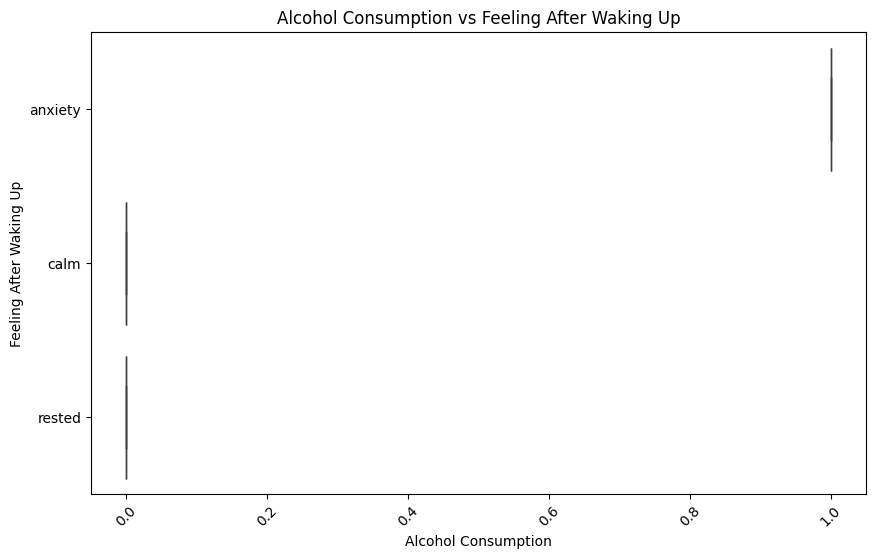

In [30]:
# Alcohol ve Uyandıktan Sonraki His Analizi
plt.figure(figsize=(10, 6))
sns.boxplot(x='Alcohol', y='The Feeling You Feel After Waking Up', data=data)
plt.title('Alcohol Consumption vs Feeling After Waking Up')
plt.xlabel('Alcohol Consumption')
plt.ylabel('Feeling After Waking Up')
plt.xticks(rotation=45)
plt.show()

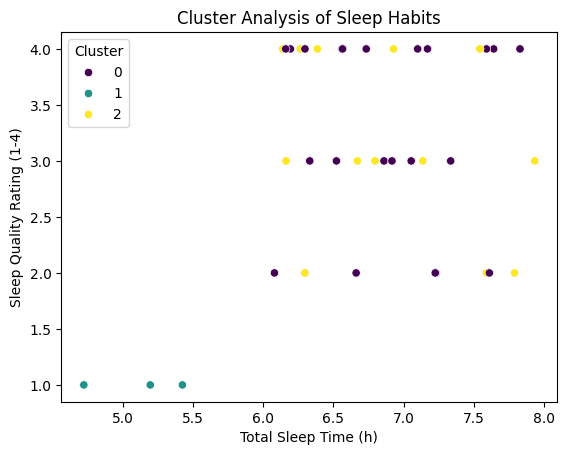

In [ ]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

features = ['Total Sleep Time (h)', 'Time to Fall Asleep (min)', 'Interruptions During Sleep', 'Stress Level (1-4)']
scaled_features = StandardScaler().fit_transform(data[features].dropna())

kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(scaled_features)

sns.scatterplot(x='Total Sleep Time (h)', y='Sleep Quality Rating (1-4)', hue='Cluster', data=data, palette='viridis')
plt.title('Cluster Analysis of Sleep Habits')
plt.show()


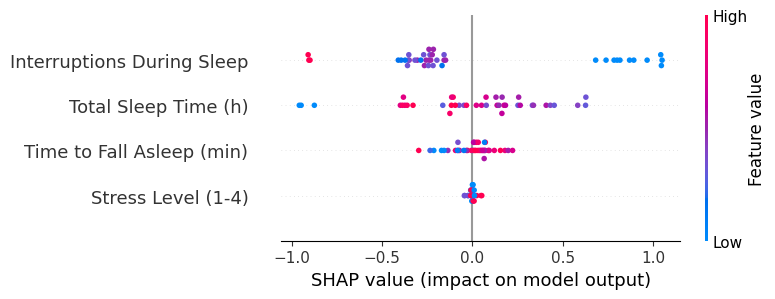

In [31]:
import shap
from sklearn.ensemble import RandomForestRegressor

X = data[['Total Sleep Time (h)', 'Time to Fall Asleep (min)', 'Stress Level (1-4)', 'Interruptions During Sleep']].dropna()
y = data['Sleep Quality Rating (1-4)'].loc[X.index]

model = RandomForestRegressor()
model.fit(X, y)

explainer = shap.Explainer(model, X)
shap_values = explainer(X)
shap.summary_plot(shap_values, X)


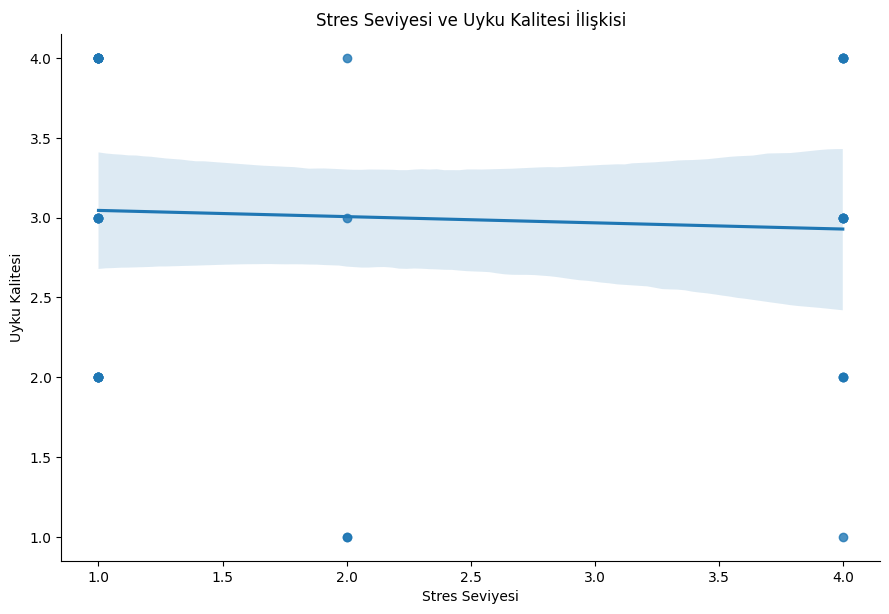

In [33]:
# 10. Sebep-Sonuç Analizi
sns.lmplot(x='Stress Level (1-4)', y='Sleep Quality Rating (1-4)', data=data, aspect=1.5, height=6)
plt.title('Stres Seviyesi ve Uyku Kalitesi İlişkisi')
plt.xlabel('Stres Seviyesi')
plt.ylabel('Uyku Kalitesi')
plt.show()